In [111]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [112]:
x=np.array([1,2])
y=np.array([300,500])

In [113]:
#Function to compute cost(mean squared error)
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    
    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+(f_wb-y[i])**2
        
    total_cost=(1/(m*2))*cost
    return total_cost

In [114]:
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    m=x.shape[0]
    
    dj_dw=0
    dj_db=0
    
    for i in range(m):
        dj_dw+=(w*x[i]+b-y[i])*x[i]
        dj_db+=(w*x[i]+b-y[i])
        
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

In [125]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iter):
    """ 
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    """

    b=b_in
    w=w_in
    J_hist=[]
    p_hist=[]
    
    for i in range(num_iter):
        dj_dw,dj_db=compute_gradient(x,y,b,w)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        
        J_hist.append(compute_cost(x,y,w,b))
        p_hist.append([w,b])
        
        if i%(num_iter/10)==0:
            print(f"Iteration {i}: cost={compute_cost(x,y,w,b)}, dj_dw= {dj_dw}, dj_db={dj_db}, w={w}, b={b}")
    return w,b,J_hist,p_hist

In [126]:
w_init=0
b_init=0

learning_rate=0.0001
num_iter=6000

final_w,final_b,J_hist,p_hist=gradient_descent(x,y,w_init,b_init,learning_rate,num_iter)

print(f"Final w= {final_w}, \n Final b={final_b}")
print(f"cost={compute_cost(x,y,final_w,final_b)}")

Iteration 0: cost=84941.75998124998, dj_dw= -650.0, dj_db=-400.0, w=0.065, b=0.04
Iteration 600: cost=56027.47501058275, dj_dw= -541.7971797629777, dj_db=-331.512376819761, w=35.71349009823225, b=21.91869310433733
Iteration 1200: cost=36533.11563210344, dj_dw= -451.8675084269446, dj_db=-274.5814434833204, w=65.43580247930655, b=40.046085336492176
Iteration 1800: cost=23471.278957381808, dj_dw= -377.12633283605993, dj_db=-227.2562927481944, w=90.23278216769921, b=55.05515077420147
Iteration 2400: cost=14790.051686724553, dj_dw= -315.0097201719408, dj_db=-187.91534982367327, w=110.93632376692905, b=67.47200978925896
Iteration 3000: cost=9081.924493124267, dj_dw= -263.3865551778026, dj_db=-155.210777773917, w=128.2378919831638, b=77.73396701006874
Iteration 3600: cost=5382.988760960422, dj_dw= -220.48547624624123, dj_db=-128.0222678424498, w=142.71222760057407, b=86.2045042965181
Iteration 4200: cost=3034.459852489489, dj_dw= -184.8341454227464, dj_db=-105.41863042989152, w=154.8370516521

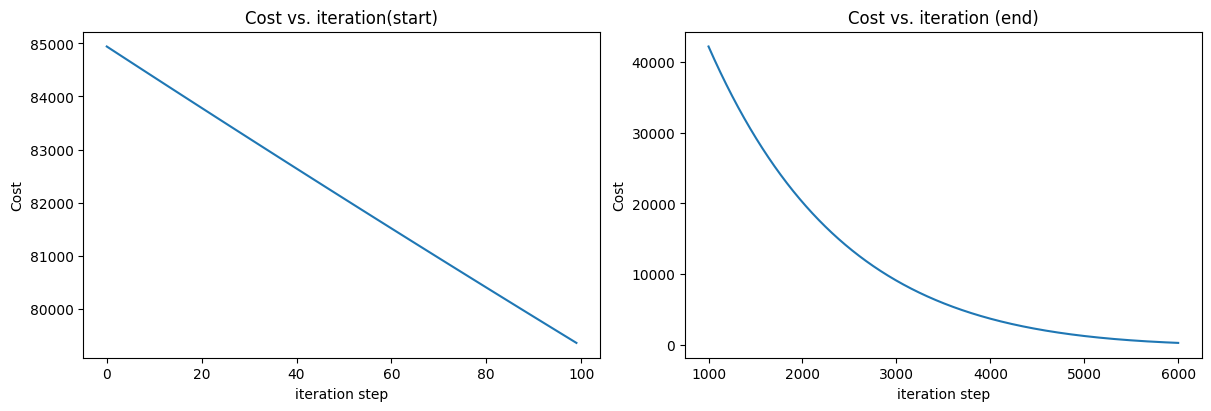

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()